In [23]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# to be used for clustering vs ground truth heatmap
from string import ascii_uppercase

# to scale the data before clustering
from sklearn.preprocessing import StandardScaler


# Clustering Model
from sklearn.cluster import AgglomerativeClustering

# plot the Dendrogram
from scipy.cluster.hierarchy import dendrogram

# Internal index (for clustering evaluation)
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score

# Dunn Index
from jqmcvi import base
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import LabelEncoder

# Yellow Brick (for distortion, silhouette, CH)
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster.elbow import kelbow_visualizer

# external Index (for clustering evalusation)
from sklearn.metrics import cluster, 
                            v_measure_score, 
                            homogeneity_completeness_v_measure

## read the dataset

In [24]:
df = pd.read_csv('dataset_for_clustering.csv')

display(df)

# separate features from class label
# note that we don't know the labels in clusteing
X = df.loc[:, df.columns != 'lettr']

# convert class labels to int (so can calc MSE (it only takes int not str))
# # LabelEncoder --> give int to each label
le = LabelEncoder()
le.fit(df['lettr'])

Y = pd.DataFrame(le.transform(df['lettr']), columns=['lettr'])

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,lettr
0,3.0,4.0,4.0,6.0,6.0,8.0,9.0,5.0,0.0,8.0,6.0,6.0,5.0,9.0,5.0,8.0,P
1,4.0,9.0,5.0,7.0,4.0,5.0,7.0,6.0,5.0,9.0,8.0,10.0,2.0,8.0,4.0,9.0,G
2,5.0,9.0,5.0,6.0,2.0,4.0,7.0,9.0,2.0,7.0,5.0,11.0,4.0,8.0,2.0,11.0,K
3,3.0,5.0,5.0,7.0,5.0,9.0,10.0,3.0,1.0,8.0,6.0,7.0,3.0,10.0,8.0,6.0,H
4,4.0,7.0,4.0,5.0,4.0,7.0,8.0,5.0,9.0,7.0,7.0,9.0,1.0,9.0,7.0,8.0,Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19959,6.0,10.0,8.0,8.0,9.0,7.0,6.0,6.0,4.0,8.0,7.0,8.0,4.0,10.0,8.0,11.0,F
19960,5.0,10.0,7.0,8.0,4.0,10.0,7.0,3.0,6.0,12.0,3.0,4.0,2.0,9.0,3.0,9.0,P
19961,1.0,0.0,2.0,0.0,0.0,7.0,7.0,3.0,10.0,8.0,6.0,8.0,0.0,8.0,6.0,8.0,Z
19962,2.0,4.0,4.0,3.0,2.0,6.0,7.0,6.0,6.0,6.0,6.0,10.0,2.0,8.0,4.0,9.0,G


## Scale the data for Clustering

In [25]:
sc = StandardScaler()

X = pd.DataFrame(sc.fit_transform(X), columns=X.columns)

# the scaled dataset (without class label)
X

,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,-0.535487,-0.918663,-0.558326,0.280466,1.143693,0.546207,0.646853,0.137982,-2.179588,-0.112573,-0.172932,-0.932026,0.840105,0.428212,0.509923,0.122925
1,-0.012009,0.599866,-0.060873,0.723827,0.227564,-0.938607,-0.215646,0.508931,-0.075789,0.290478,0.588267,0.999811,-0.448650,-0.220360,0.119582,0.744841
2,0.511469,0.599866,-0.060873,0.280466,-0.688565,-1.433545,-0.215646,1.621778,-1.338068,-0.515625,-0.553532,1.482770,0.410520,-0.220360,-0.661101,1.988672
3,-0.535487,-0.614957,-0.060873,0.723827,0.685628,1.041145,1.078103,-0.603917,-1.758828,-0.112573,-0.172932,-0.449067,-0.019065,1.076784,1.680947,-1.120906
4,-0.012009,-0.007545,-0.558326,-0.162896,0.227564,0.051269,0.215603,0.137982,1.607250,-0.515625,0.207667,0.516852,-0.878235,0.428212,1.290605,0.122925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19959,1.034947,0.903572,1.431484,1.167189,2.517887,0.051269,-0.646896,0.508931,-0.496549,-0.112573,0.207667,0.033892,0.410520,1.076784,1.680947,1.988672
19960,0.511469,0.903572,0.934031,1.167189,0.227564,1.536083,-0.215646,-0.603917,0.344971,1.499634,-1.314732,-1.897945,-0.448650,0.428212,-0.270760,0.744841
19961,-1.582444,-2.133487,-1.553230,-2.379704,-1.604694,0.051269,-0.215646,-0.603917,2.028010,-0.112573,-0.172932,0.033892,-1.307819,-0.220360,0.900264,0.122925
19962,-1.058966,-0.918663,-0.558326,-1.049619,-0.688565,-0.443669,-0.215646,0.508931,0.344971,-0.918677,-0.172932,0.999811,-0.448650,-0.220360,0.119582,0.744841


## Functions to Plot the Dendrogram of the model

In [26]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

def full_dendrogram(model, **kwargs):
    # set the plot size
    fig, ax = plt.subplots(figsize=(20, 5))

    plt.title('Hierarchical Clustering Dendrogram')
    plot_dendrogram(model, **kwargs, ax=ax) 
    plt.xlabel("Number of points in node (or index of point if no parenthesis).")
    plt.show()

## Train the model

{'affinity': 'euclidean',
 'compute_distances': False,
 'compute_full_tree': 'auto',
 'connectivity': None,
 'distance_threshold': 0,
 'linkage': 'ward',
 'memory': None,
 'n_clusters': None}

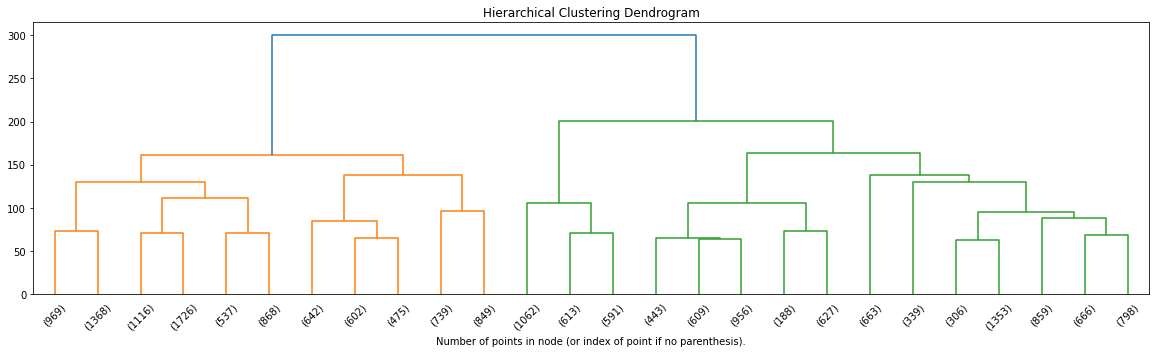

In [68]:
# setting distance_threshold=0 ensures we compute the full tree.
agglo = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

agglo = agglo.fit(X)

display(agglo.get_params())

# plot the full dendrogram (takes too much time)
# full_dendrogram(agglo)

# plot the top three/3 levels of the dendrogram
full_dendrogram(agglo, truncate_mode='lastp', p=26)

# deduce that we cannot find the optimal # clusters based on dendrogram
# since the clusters are so close to each other (height of the merge are small)
# actually dendrogram says the optimal # clusters is 2/two (look at the colors: orange & green)
# and truncating it to 26 clusters (as our ground truth) shows that the number of 
# datapoint in clusters are not balanced in spite of the fact that the number of 
# class labels are balance (roughly the same) so by just looking at the dendrogram
# we can say that the clustering results are not good enough

## Find the best K (# Clusters)

#### Internal Index (Dunn, DB, Silhouette)

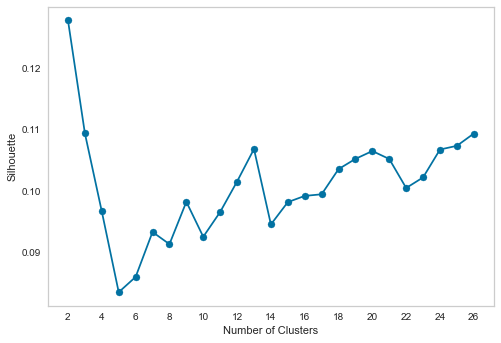

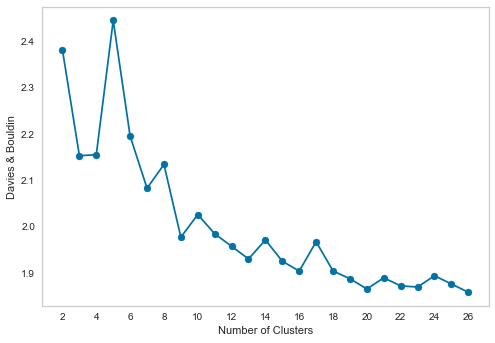

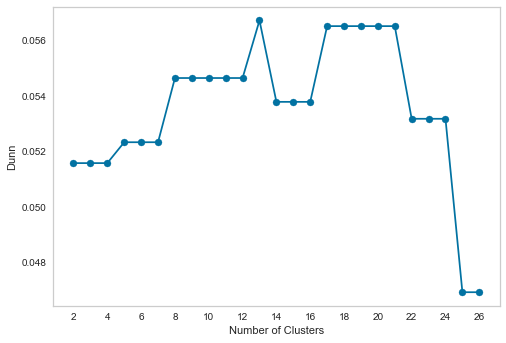

In [16]:
def plot_internal_indexes(criteria: str, criteria_results: list, num_clusters: list):
    '''
    plot the internal index against number of clusters
    '''
    plt.plot(num_clusters, criteria_results)
    # for dots to represent our clustering result on the curve
    plt.scatter(num_clusters, criteria_results)
    plt.xlabel('Number of Clusters')
    plt.ylabel(criteria)

    # to force x-axis (#clusters) to be integers
    locator = matplotlib.ticker.MultipleLocator(2)
    plt.gca().xaxis.set_major_locator(locator)
    formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}")
    plt.gca().xaxis.set_major_formatter(formatter)

    plt.grid()
    # to ensure that each plot is drawn separately
    plt.show()
    
    
list_num_clusters = list(range(2, 27, 1))
silhouette_list = []
db_list = []
dunn_list = []

for num_clusters in list_num_clusters:
    agglo = AgglomerativeClustering(n_clusters=num_clusters)
    agglo = agglo.fit(X)

#     silhouette_list.append(silhouette_score(X, agglo.labels_))
    
    db_list.append(davies_bouldin_score(X, agglo.labels_))

    # fast implementation of Dunn Index 
    dunn_score = base.dunn_fast(X, agglo.labels_) 
    dunn_list.append(dunn_score)
    
# # plot Silhouette Inernal Index
# plot_internal_indexes('Silhouette', silhouette_list, list_num_clusters)

# plot Davies & Bouldin Inernal Index
plot_internal_indexes('Davies & Bouldin', db_list, list_num_clusters)

# plot Dunn Internal Index
plot_internal_indexes('Dunn', dunn_list, list_num_clusters)

#### Internal Index (Distortion, Silhouette, and CH)

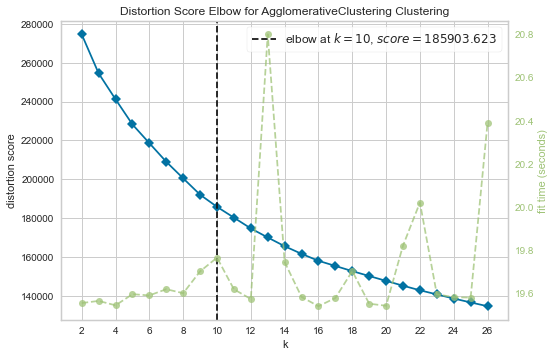

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
num_clusters = 26

# agglo = AgglomerativeClustering(n_clusters=num_clusters)
agglo = AgglomerativeClustering()
# agglo = agglo.fit(X)

# Elbow Method with distortion:
metric
# k is range of number of clusters.
visualizer = KElbowVisualizer(agglo, k=(2, 27), metric='distortion', timings= True)

# to force x-axis (#clusters) to be integers
locator = matplotlib.ticker.MultipleLocator(2)
plt.gca().xaxis.set_major_locator(locator)
formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}")
plt.gca().xaxis.set_major_formatter(formatter)

visualizer.fit(X)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

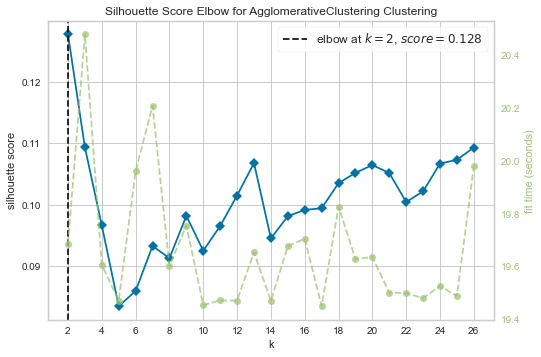

<AxesSubplot:title={'center':'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [11]:
num_clusters = 26

# agglo = AgglomerativeClustering(n_clusters=num_clusters)
agglo = AgglomerativeClustering()
# agglo = agglo.fit(X)

# Elbow Method with Silhoette metric
# k is range of number of clusters.
visualizer = KElbowVisualizer(agglo, k=(2, 27), metric='silhouette', timings= True)

# to force x-axis (#clusters) to be integers
locator = matplotlib.ticker.MultipleLocator(2)
plt.gca().xaxis.set_major_locator(locator)
formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}")
plt.gca().xaxis.set_major_formatter(formatter)

visualizer.fit(X)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

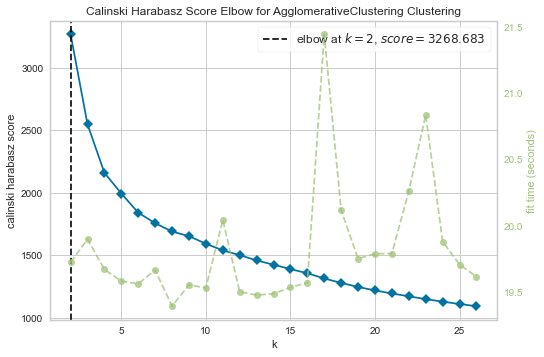

KeyboardInterrupt: 

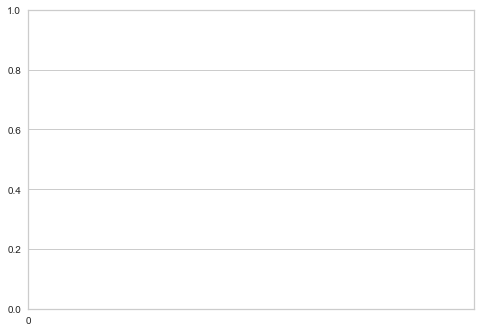

In [15]:
num_clusters = 26

# agglo = AgglomerativeClustering(n_clusters=num_clusters)
agglo = AgglomerativeClustering()
# agglo = agglo.fit(X)

# Elbow Method for Hierarchical clustering
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer

# k is range of number of clusters.
# Slow method
# visualizer = KElbowVisualizer(agglo, k=(2, 27), metric='calinski_harabasz', timings= True)

# Quick method and immediately show the figure
kelbow_visualizer(agglo, X, k=(2, 27), metric='calinski_harabasz', timings= True)

# to force x-axis (#clusters) to be integers
locator = matplotlib.ticker.MultipleLocator(2)
plt.gca().xaxis.set_major_locator(locator)
formatter = matplotlib.ticker.StrMethodFormatter("{x:.0f}")
plt.gca().xaxis.set_major_formatter(formatter)

visualizer.fit(X)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

#### External Index (Entropy, Misclassification Error, Gini Index)

In [41]:
# use v-measure which is the harmonic mean of 
# completeness (assigning all class members to the same clusters)
# and homogeneity (to have pure clusters with members coming from the same classes)
# to determine which one of the # clusters candidate works best Based on grand truth

list_num_clusters = [2, 10, 18, 26]

# an empty df to store external indexes later on
df_list_clustering = []

for num_clusters in list_num_clusters:
    # an empty df to store external indexes later on
    df_n_cluster = pd.DataFrame(columns=['homogeneity', 'completeness', 'V Measure'])
    list_linkage_ext_index = []
    
    for linkage in ['ward', 'complete', 'single']:
        agglo = AgglomerativeClustering(n_clusters=num_clusters, linkage=linkage)
        agglo = agglo.fit(X)

        cluster_labels = agglo.labels_
        # class labels is Ground Truth (but in numerical (encoded) Format hence 0-25)
        class_labels = Y['lettr']
        
        homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(class_labels, cluster_labels)
        df_ext_index = pd.DataFrame({'homogeneity': homogeneity, 'completeness': completeness, 'V Measure': v_measure}, index=[linkage])
#         display(df_ext_index)
        
        list_linkage_ext_index.append(df_ext_index)
    
    # create a merged df to show all 3 external indexes for each linkage criteria
    merge_linkage_ext_index = pd.concat([list_linkage_ext_index[0], list_linkage_ext_index[1], list_linkage_ext_index[2]])
#     display(merge_linkage_ext_index)
        
    df_list_clustering.append(merge_linkage_ext_index)

# final_ext_index = pd.concat([df_list_clustering[0], df_list_clustering[1]], keys=list(map(lambda x: f'{x:d} clusters', list_num_clusters)))
final_ext_index = pd.concat([df_list_clustering[i] for i in range(len(list_num_clusters))], keys=list(map(lambda x: f'{x:d} clusters', list_num_clusters)))

display(final_ext_index)

homogeneity  completeness  V Measure
2 clusters  ward         0.015056      0.070762   0.024828
            complete     0.013530      0.094869   0.023683
            single       0.000050      0.297126   0.000100
10 clusters ward         0.246043      0.371882   0.296149
            complete     0.122072      0.225989   0.158517
            single       0.000750      0.325414   0.001497
18 clusters ward         0.347072      0.412012   0.376764
            complete     0.200977      0.276648   0.232818
            single       0.010751      0.542927   0.021085
26 clusters ward         0.411677      0.424277   0.417882
            complete     0.296224      0.340444   0.316798
            single       0.011347      0.522469   0.022212

In [45]:
# for num_clustering we have considered multiple choices 2, 10, 18, 26
# 2 is the best according to silhoette and CH
# 10~18 is the best cluster number based on DB, Dunn and distortion
# 26 is a good choice since we already know our class lablels (26 capital letters)
# and based on external indexes gives us the higest v-measure

## Now let's see how our fine-tuned clustering model fared against the ground truth (class labels) 

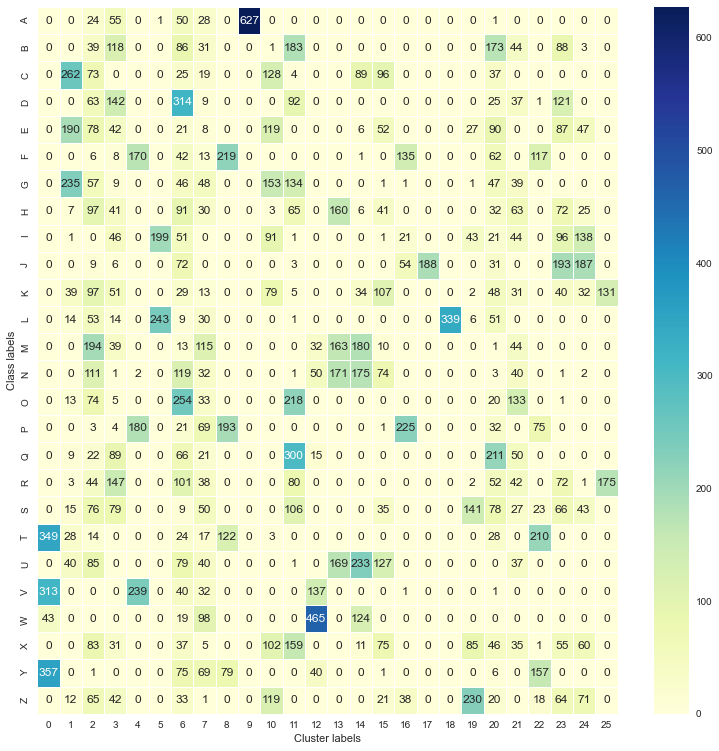

In [33]:
# It's better (not nessecary) to set the #clusters to 26 (# of our true labels)
# so we can compare the clustering results with our ground truths
# then show that for some clusters all the members have the same class label
# which shows those clusters has done a good job

# plot the confustion matrix

# Based on Dunn, Silhouette and DB we cocluded that
# 10 clusters is the best trade off for us
num_clusters = 26

agglo = AgglomerativeClustering(n_clusters=num_clusters)
agglo = agglo.fit(X)

cluster_labels = agglo.labels_
# class labels is Ground Truth (but in numerical (encoded) Format hence 0-25)
class_labels = Y['lettr']

clustering_contingency_matrix = cluster.contingency_matrix(class_labels, cluster_labels, eps=None, sparse=False)
# since contingency_matrix is a 2darray we convert it to a DataFrame with class labels as Indexes
clustering_contingency_matrix = pd.DataFrame(clustering_contingency_matrix, index=list(ascii_uppercase))

# plot the clustering contingency matrix as heatmap
# # plot size for 10 clusters
# fig, ax = plt.subplots(figsize=(10, 13))
# plot size for 26 clusters
fig, ax = plt.subplots(figsize=(13, 13))

ax = sns.heatmap(clustering_contingency_matrix, cmap="YlGnBu", linewidth=1, annot=True, fmt='d')
plt.xlabel("Cluster labels")
plt.ylabel("Class labels")
plt.show()